## Sieci interakcji postaci w serialu HBO „Gra o tron”
Pary postaci są połączone (nieukierunkowanymi) krawędziami ważonymi liczbą interakcji.

Istnieje pięć rodzajów interakcji. Postać A i Postać B są połączone, gdy:

1. Postać A mówi bezpośrednio po Postać B
2. Postać A mówi o postaci B
3. Postać C mówi o postaci A i postaci B
4. Postać A i postać B są wymienione w tym samym kierunku scenicznym
5. Postać A i postać B pojawiają się razem w scenie


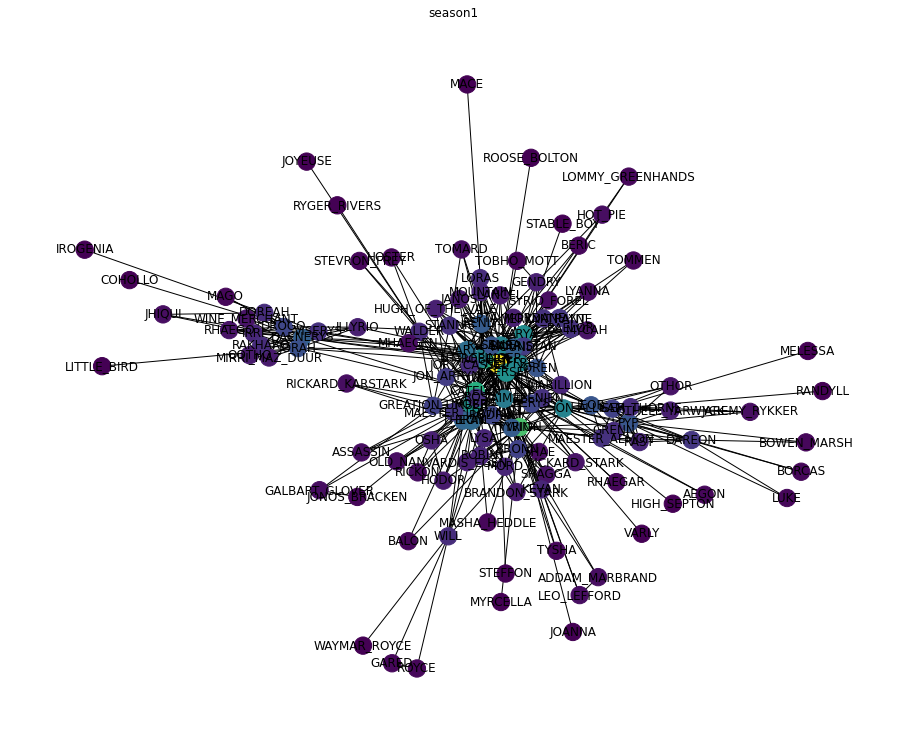

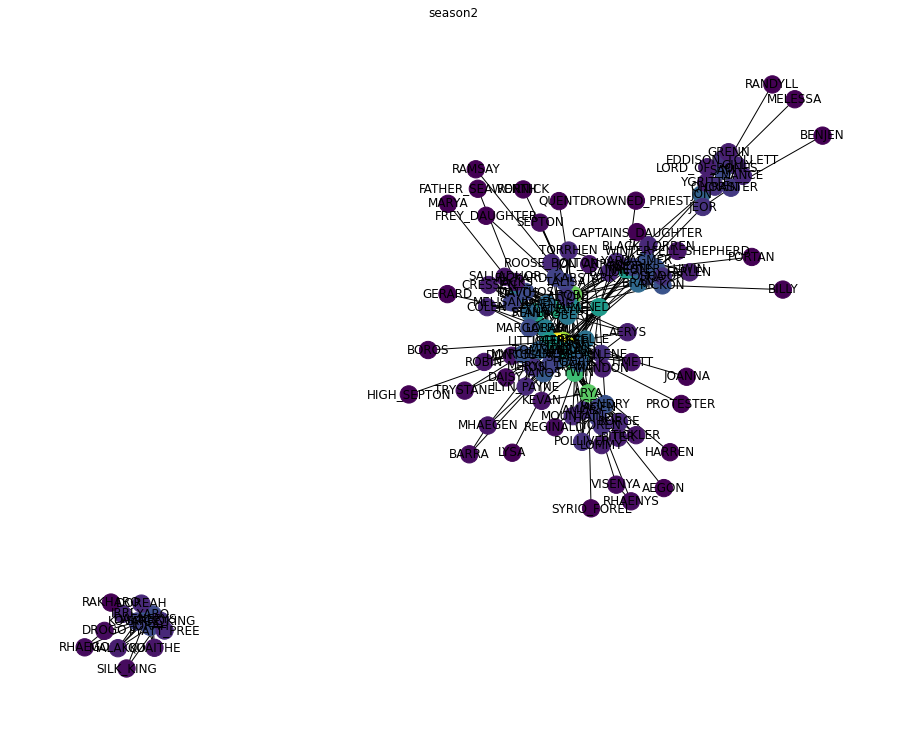

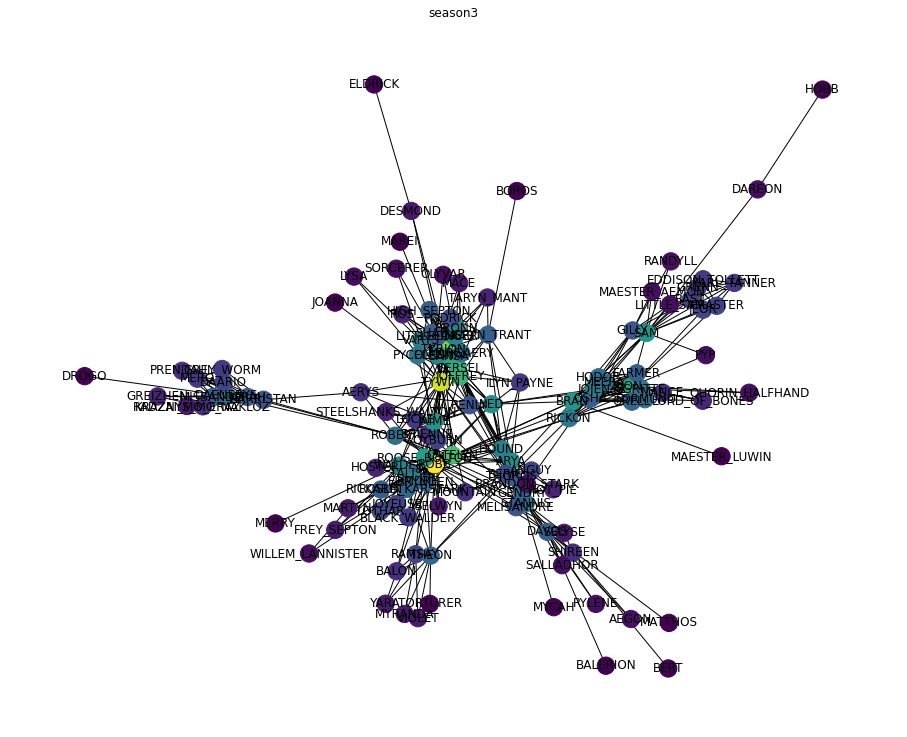

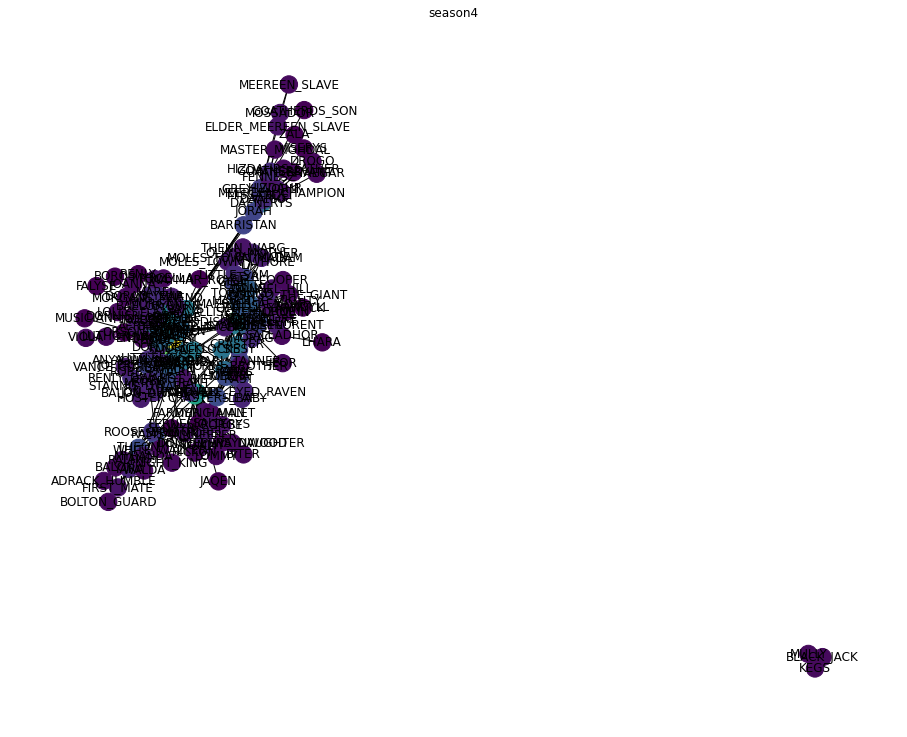

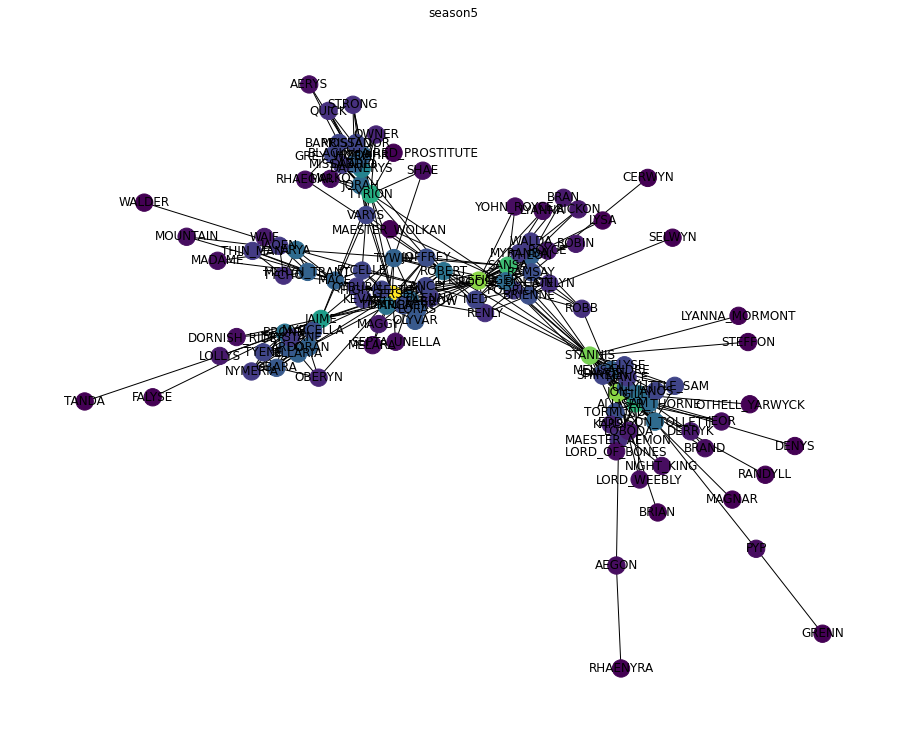

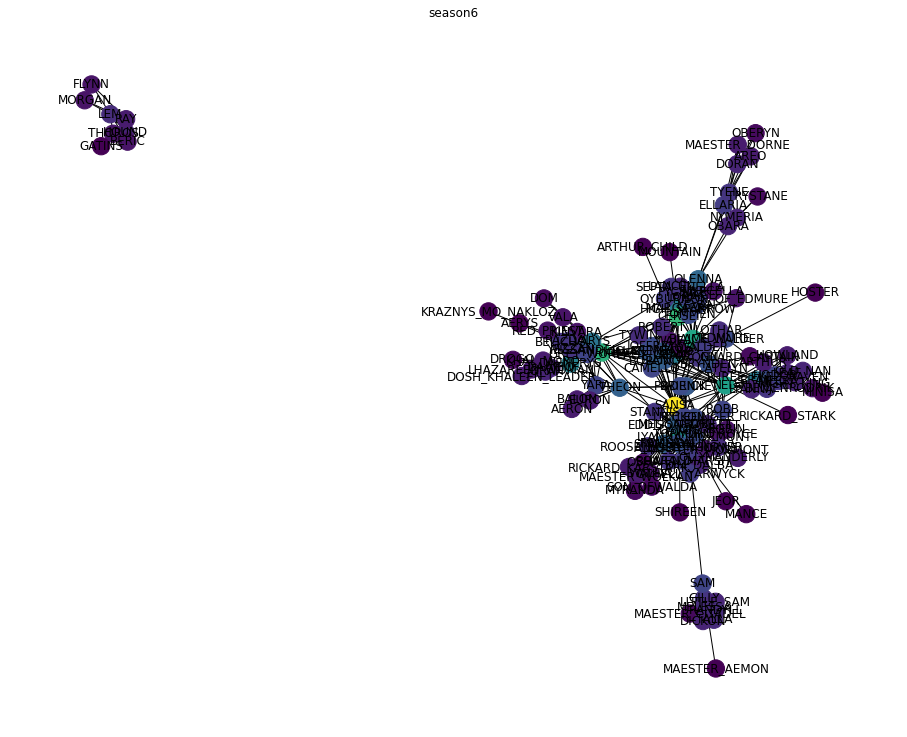

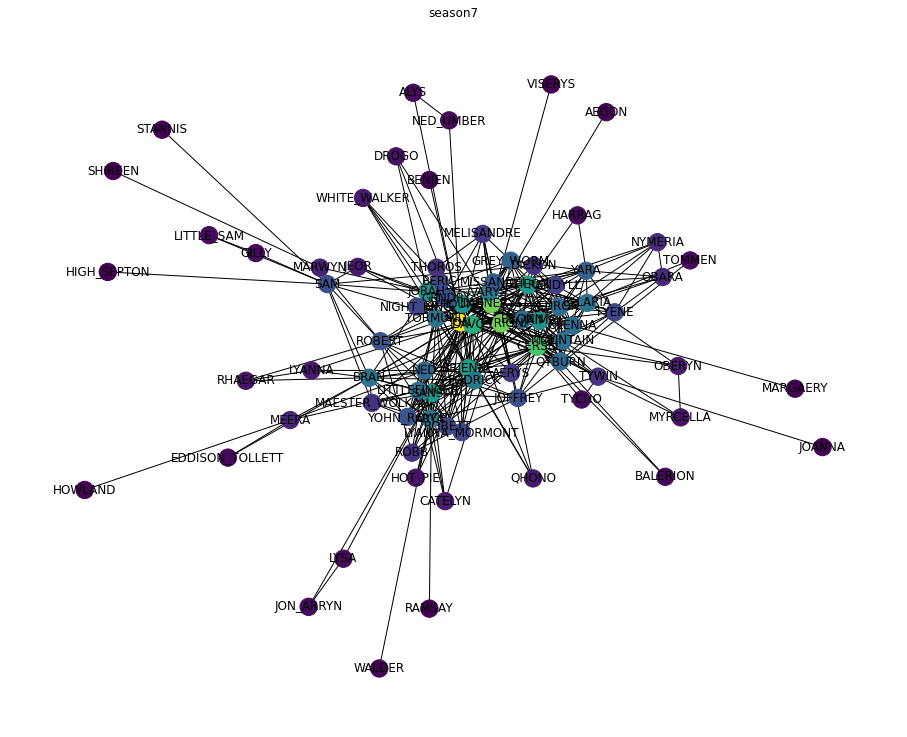

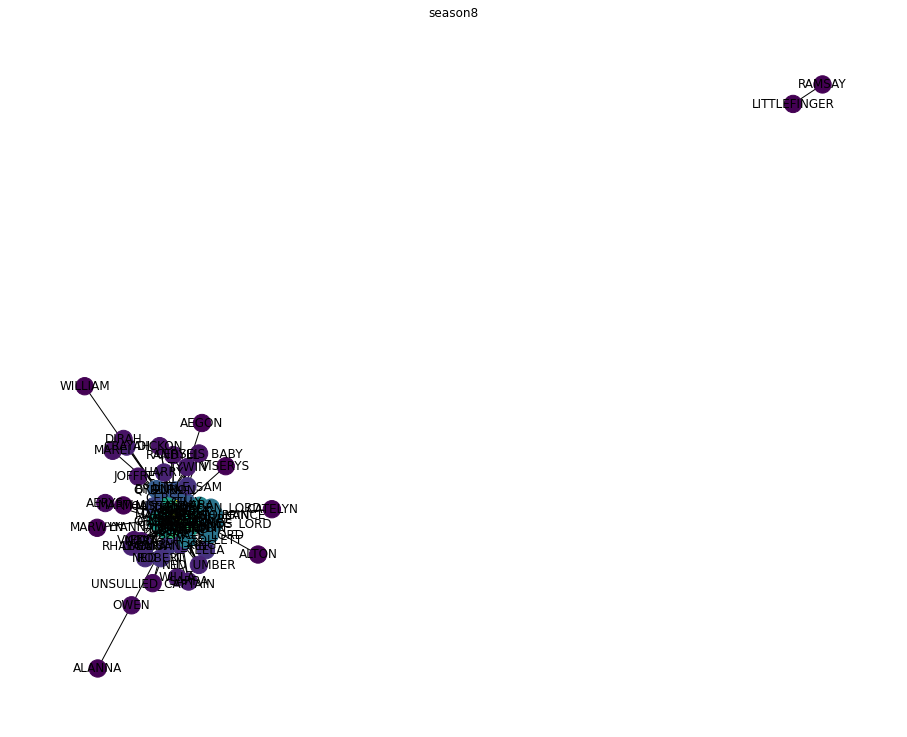

In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
seasons={}
people={}
all_people=[]
files=[]
for i in range(1,9):
    filename ="got-s"+str(i)+"-edges.csv"
    files.append(filename)
    lines = [line.split(':') for line in open(filename,'r', encoding='utf-8')]
    seasons[i]=[]
    people[i]=[]
    for line in lines:
        key = line[0].strip().split(',')
        seasons[i].append((key[0],key[1],key[2]))
        if key[0] not in people[i]:
            people[i].append(key[0])
        if key[1] not in people[i]:
            people[i].append(key[1])
        if key[0] not in all_people:
            all_people.append(key[0])
        if key[1] not in all_people:
            all_people.append(key[1])
    people[i].remove('Source')
    people[i].remove('Target')
    all_people.remove('Source')
    all_people.remove('Target')
    seasons[i].remove(('Source', 'Target', 'Weight'))
    plt.figure(figsize=(16,13)) 
    plt.title("season"+str(i))
    G=nx.Graph()
    G.add_nodes_from(people[i])
    G.add_weighted_edges_from(seasons[i])
    dcent = nx.degree_centrality(G)
    pos = nx.spring_layout(G)
    dcent_color = [i for i in dcent.values()]
    nx.draw(G, with_labels=True, pos=pos, node_color=dcent_color)
    #net = Network('100%', '100%',bgcolor="#222222", font_color="white")
    #net.from_nx(G)
    #net.show("season"+str(i)+".html")

In [2]:

import pandas as pd 
#dfs = [pd.read_csv(f) for f in files]

# All seasons dataframe
# df = pd.concat(dfs, ignore_index=True)
df=pd.read_csv('got-s3-edges.csv')
#df=pd.read_csv('all.csv', delimiter=";")
df.head()

Source   Target  Weight  Season
0      JON  YGRITTE     159       3
1  BRIENNE    JAIME     127       3
2   TYRION    TYWIN     115       3
3   RAMSAY    THEON     114       3
4   CERSEI   TYRION      95       3

In [3]:
df.tail()

Source   Target  Weight  Season
499              SELYSE  SHIREEN       2       3
500                SHAE    TYWIN       2       3
501  STEELSHANKS_WALTON    TYWIN       2       3
502              TYRION   WALDER       2       3
503               TYWIN   WALDER       2       3

In [4]:
all_got=nx.from_pandas_edgelist(df,source='Source',target='Target', edge_attr=['Weight'])

In [5]:
plt.figure(figsize=(100,100))
pos = nx.spring_layout(all_got)
nx.draw(all_got, with_labels=True, pos=pos)
net = Network('100%', '100%',bgcolor="#222222", font_color="white")
net.from_nx(all_got)
net.show("all_seasons.html")

## Miary centralności
1. **Betweenness centrality** 

a) Centralność pośrednia dla każdego wierzchołka to liczba tych najkrótszych ścieżek, które przechodzą przez wierzchołek. 

b) Węzeł o większej centralności między połączeniami ma większą kontrolę nad siecią, ponieważ przez ten węzeł przechodzi więcej informacji.

2. **Closeness centrality**

a) Centralność bliskości węzła mierzy jego średnią odległość (odległość odwrotna) do wszystkich innych węzłów. Węzły o wysokim wyniku bliskości mają najkrótsze odległości do wszystkich innych węzłów.

b) Centralność bliskości to sposób wykrywania węzłów, które są w stanie bardzo wydajnie rozpowszechniać informacje za pośrednictwem grafu.

3. **Eigenvector centrality**

a) W teorii grafów centralność wektora własnego jest miarą wpływu węzła w sieci . Względne oceny są przypisywane wszystkim węzłom w sieci w oparciu o koncepcję, że połączenia z węzłami o wysokiej punktacji mają większy wpływ na ocenę danego węzła niż równe połączenia z węzłami o niskiej punktacji. Wysoki wynik wektora własnego oznacza, że węzeł jest połączony z wieloma węzłami, które same mają wysokie wyniki.

4. **Degree centrality**

a) Stopień węzła to liczba powiązań społecznych (tj. krawędzi), jakie ma.
Centralność stopnia dla węzła to po prostu jego stopień odzwierciedlony w skali 0-1, gdzie 1 ma przypisany węzeł o najwyższym stopniu.

In [6]:
nodes =pd.DataFrame(all_people)
nodes.columns=['people']

In [7]:
nodes.head()

people
0       NED
1    ROBERT
2  DAENERYS
3     JORAH
4       JON

In [8]:
bet_cen = nx.betweenness_centrality(all_got)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen = df_bet_cen.reset_index()
df_bet_cen.columns=['people', 'betweenness_centrality']

In [9]:
clo_cen = nx.closeness_centrality(all_got)
df_clo_cen = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo_cen = df_clo_cen.reset_index()
df_clo_cen.columns=['people', 'closeness_centrality']

In [10]:
eig_cen = nx.eigenvector_centrality(all_got)
df_eig_cen = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig_cen = df_eig_cen.reset_index()
df_eig_cen.columns=['people', 'eigenvector_centrality']

In [11]:
deg_cen = nx.degree_centrality(all_got)
df_deg_cen = pd.DataFrame.from_dict(deg_cen, orient='index')
df_deg_cen = df_deg_cen.reset_index()
df_deg_cen.columns=['people', 'degree_centrality']

In [12]:
analyse= pd.merge(nodes,df_bet_cen, on = ['people'])
analyse = pd.merge(analyse,df_clo_cen, on = ['people'])
analyse = pd.merge(analyse,df_eig_cen, on = ['people'])
analyse = pd.merge(analyse,df_deg_cen, on = ['people'])
analyse.head()

people  betweenness_centrality  closeness_centrality  \
0       NED                0.174555              0.455556   
1    ROBERT                0.161207              0.395498   
2  DAENERYS                0.060330              0.297821   
3     JORAH                0.038236              0.296386   
4       JON                0.135987              0.390476   

   eigenvector_centrality  degree_centrality  
0                0.145164           0.130081  
1                0.078285           0.097561  
2                0.008120           0.097561  
3                0.007979           0.081301  
4                0.056165           0.154472

## Wykrywanie społeczności

**greedy_modularity_communities()**

Ta funkcja wykorzystuje **zachłanną maksymalizację modularności Clauseta-Newmana-Moore'a**, aby znaleźć partycję społeczności o największej modułowości.

Maksymalizacja zachłannej modułowości rozpoczyna się od każdego węzła w jego własnej społeczności i wielokrotnie łączy parę społeczności, które prowadzą do największej modułowości, aż dalsze zwiększenie modułowości nie jest możliwe (maksimum). 

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities


import random
#communities = girvan_newman(all_got)
communities = greedy_modularity_communities(all_got)


node_groups = []
#for com in next(communities):
for com in communities:
    node_groups.append(list(com))

print(len(node_groups))

color_map = {}
color_scale=[]

for i in range(len(node_groups)):
    color = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    color_scale.append(color)
    
for node in all_got:
    color_map[node]=[]
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map[node]=color_scale[i]

com = pd.DataFrame.from_dict(color_map, orient='index')
com = com.reset_index()
com.columns=['people', 'community_color']
print(com)
analyse = pd.merge(analyse,com, on = ['people'])
analyse.head()

5
              people community_color
0                JON         #F47036
1            YGRITTE         #F47036
2            BRIENNE         #2F0EF9
3              JAIME         #3079C1
4             TYRION         #C18ADE
..               ...             ...
119           RYLENE         #3079C1
120          DESMOND         #C18ADE
121          ELDRICK         #C18ADE
122  QHORIN_HALFHAND         #F47036
123             LYSA         #C18ADE

[124 rows x 2 columns]


people  betweenness_centrality  closeness_centrality  \
0       NED                0.174555              0.455556   
1    ROBERT                0.161207              0.395498   
2  DAENERYS                0.060330              0.297821   
3     JORAH                0.038236              0.296386   
4       JON                0.135987              0.390476   

   eigenvector_centrality  degree_centrality community_color  
0                0.145164           0.130081         #3079C1  
1                0.078285           0.097561         #3079C1  
2                0.008120           0.097561         #A0F408  
3                0.007979           0.081301         #A0F408  
4                0.056165           0.154472         #F47036

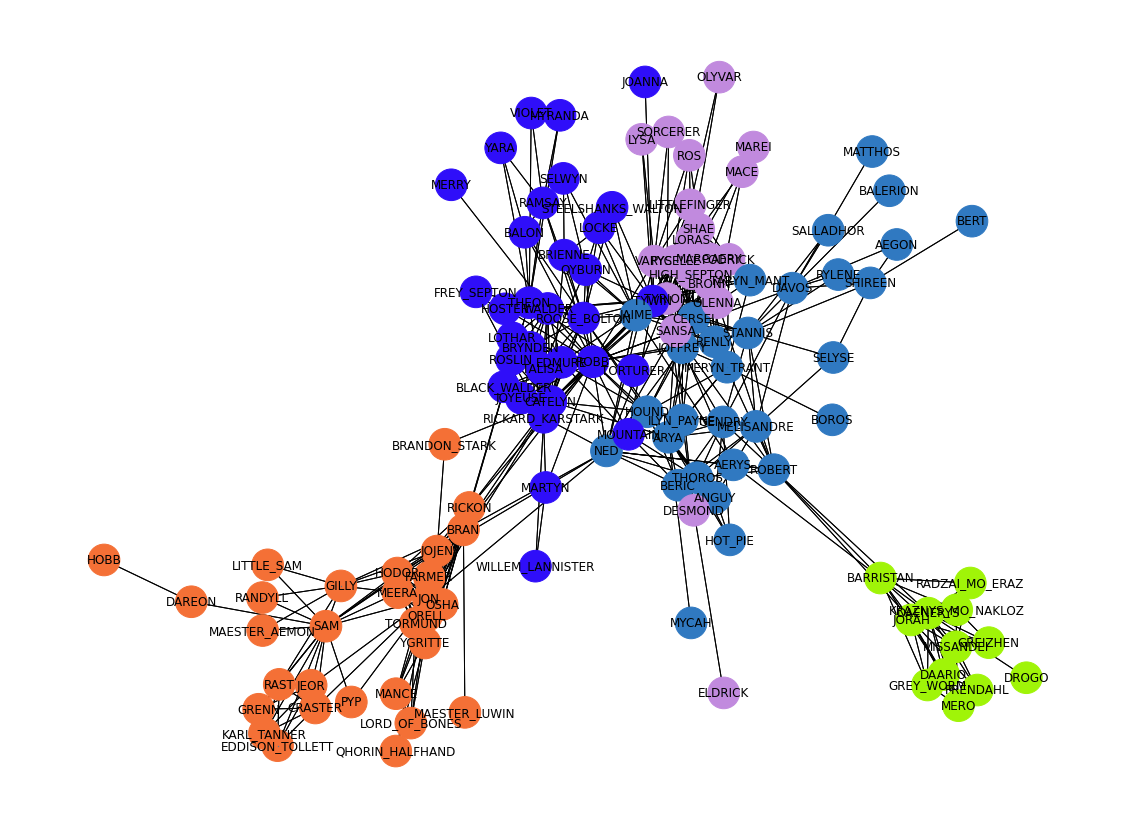

In [14]:
plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(all_got, pos, nodelist=analyse['people'], node_color=analyse['community_color'],node_size=1000)
nx.draw_networkx_edges(all_got, pos=pos)
nx.draw(all_got, with_labels=True, pos=pos, node_size=0.1)


In [15]:
analyse.to_csv('all_got_seasons.csv')

In [29]:
nx.dijkstra_path(all_got, "ARYA" , "YGRITTE", weight='weight')

['ARYA', 'CATELYN', 'BRAN', 'YGRITTE']